In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [173]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
print(df_train.head(5))
print(df_test.head(5))

   Gender  Age  openness  ...  agreeableness  extraversion  Personality (Class label)
0    Male   17         7  ...              3             2                extraverted
1    Male   19         4  ...              6             6                    serious
2  Female   18         7  ...              5             5                 dependable
3  Female   22         5  ...              4             3                extraverted
4  Female   19         7  ...              5             4                     lively

[5 rows x 8 columns]
   Gender  Age  openness  ...  agreeableness  extraversion  Personality (class label)
0  Female   20         7  ...              5             5                 dependable
1    Male   17         5  ...              2             4                    serious
2  Female   25         5  ...              2             4                    serious
3  Female   18         6  ...              4             7                    serious
4  Female   19         2  ...   

In [191]:
df_train.isna().sum()

Gender               0
Age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
dtype: int64

In [174]:
df_train = df_train.rename(columns = {'Personality (Class label)': 'Personality'})
df_test = df_test.rename(columns = {'Personality (class label)': 'Personality'})

In [175]:
X_train = df_train.loc[:, df_train.columns != 'Personality']
Y_train = df_train['Personality']
X_test = df_test.loc[:, df_test.columns != 'Personality']
Y_test = df_test['Personality']

In [192]:
print(X_train.shape, Y_train.shape)

(709, 8) (709,)


In [177]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Gender               0
Age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
dtype: int64
Gender               0
Age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
dtype: int64


In [178]:
for column in X_train:
  print(column, X_train[column].unique())

Gender ['Male' 'Female' '5']
Age [17 19 18 22 20 27 21 28 23 25 26 24  5]
openness [7 4 5 6 3 2 1 8]
neuroticism [4 5 6 7 3 1 2 8]
conscientiousness [7 4 6 5 2 3 1 8]
agreeableness [3 6 5 4 7 1 2 8]
extraversion [2 6 5 3 4 7 1]


In [179]:
for column in X_test:
  print(column, X_test[column].unique())

Gender ['Female' 'Male']
Age [20 17 25 18 19 24 27 21 23 22 26 28  5]
openness [7 5 6 2 1 4 3 8]
neuroticism [9 4 5 2 1 6 3 7 8]
conscientiousness [9 5 7 4 6 1 3 2 8]
agreeableness [5 2 4 1 6 3 7 8]
extraversion [5 4 7 3 6 2 1 8]


In [180]:
X_train[X_train['Gender']=='5'].index.values

array([449])

In [181]:
gender_mode = X_train['Gender'].mode().values
X_train.at[449, 'Gender'] = gender_mode[0]
X_train.loc[449, 'Gender']

'Female'

In [182]:
X_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [184]:
X_train=pd.get_dummies(X_train, columns=["Gender"], prefix=["Gender_is"])
X_test=pd.get_dummies(X_test, columns=["Gender"], prefix=["Gender_is"])

In [187]:
X_train

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Gender_is_Female,Gender_is_Male
0,17,7,4,7,3,2,0,1
1,19,4,5,4,6,6,0,1
2,18,7,6,4,5,5,1,0
3,22,5,6,7,4,3,1,0
4,19,7,4,6,5,4,1,0
...,...,...,...,...,...,...,...,...
704,20,4,5,6,6,1,1,0
705,18,6,3,1,5,5,0,1
706,22,5,2,3,6,1,0,1
707,19,5,6,5,7,5,0,1


In [196]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.fit_transform(Y_test)

In [197]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

0.30158730158730157

#Data Preprocessing

In [202]:
df = pd.read_csv('/content/personality_data.csv')
df.head(5)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [203]:
df = df.rename(columns = {'Personality (Class label)': 'Personality'})
for column in df:
  print(column, df[column].unique())

Gender ['Male' 'Female' '5']
Age [17 19 18 22 20 27 21 28 23 25 26 24  5]
openness [7 4 5 6 3 2 1 8]
neuroticism [4 5 6 7 3 1 2 8 9]
conscientiousness [7 4 6 5 2 3 1 8 9]
agreeableness [3 6 5 4 7 1 2 8]
extraversion [2 6 5 3 4 7 1 8]
Personality ['extraverted' 'serious' 'dependable' 'lively' 'responsible']


In [204]:
df[df['Gender']=='5'].index.values


array([449])

In [205]:
gender_mode = df['Gender'].mode().values
df.at[449, 'Gender'] = gender_mode[0]
df.loc[449, 'Gender']

'Female'

#### Encoding Categorical values

In [206]:
le = LabelEncoder()
df['Personality'] = le.fit_transform(df['Personality'])
le_personality_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_personality_mapping)

{'dependable': 0, 'extraverted': 1, 'lively': 2, 'responsible': 3, 'serious': 4}


In [210]:
df_final = pd.get_dummies(df, columns=["Gender"], prefix=["Gender_is"])

In [211]:
df_final

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality,Gender_is_Female,Gender_is_Male
0,17,7,4,7,3,2,1,0,1
1,19,4,5,4,6,6,4,0,1
2,18,7,6,4,5,5,0,1,0
3,22,5,6,7,4,3,1,1,0
4,19,7,4,6,5,4,2,1,0
...,...,...,...,...,...,...,...,...,...
1019,19,6,5,6,4,3,1,1,0
1020,18,2,5,8,3,7,0,0,1
1021,18,7,5,6,2,7,4,0,1
1022,23,6,7,5,4,3,1,0,1


#Exploratory Data Analysis(EDA)

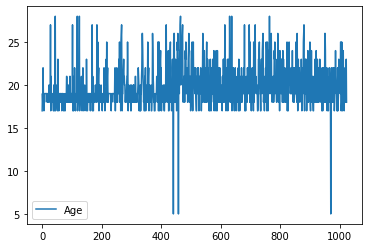

In [212]:
sns.lineplot(data = df['Age'],label = 'Age')

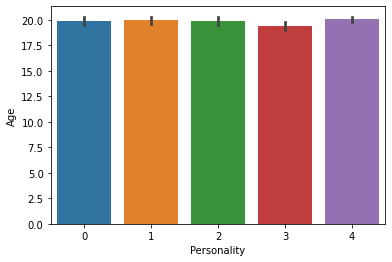

In [213]:
sns.barplot(y=df['Age'], x=df['Personality'])

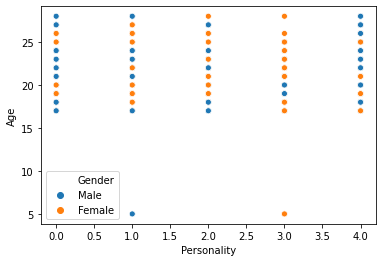

In [214]:
sns.scatterplot(y=df['Age'], x=df['Personality'], hue=df['Gender'])

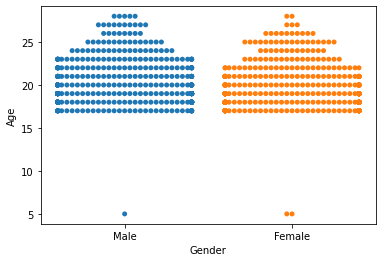

In [215]:
sns.swarmplot(x=df['Gender'],y=df['Age'])

##Train and Test the data

In [260]:
from sklearn.model_selection import train_test_split
X = df_final.loc[:, df_final.columns != 'Personality']
y = df_final['Personality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape)

(921, 8) (103, 8)


In [261]:
from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.3106796116504854

In [262]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.3592233009708738

In [263]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train, y_train)
pr = svm.predict(X_test)
score = accuracy_score(y_test, pr, normalize=False)
print(score)
print(svm.score(X_test,y_test))

40
0.3883495145631068


In [264]:
import pickle
with open('personality_model.pkl', 'wb') as file:
  pickle.dump(svm, file)